In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import compute_class_weight

In [150]:
df=pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depresion\tfidf_data.csv")

In [151]:
df_tar=pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depresion\clean_data.csv")
df_tar

,Index,message,result
0,106,real good moment miss much,0
1,217,read manga,0
2,220,comeagainjen,0
3,288,lapcat need send account tomorrow oddli even r...,0
4,540,add myspac,0
...,...,...,...
10287,802308,mani suffer depress sad feel noth persist nag ...,1
10288,802309,depress herbo mood done stress peopl deserv,1
10289,802310,what depress succumb brain make feel like neve...,1
10290,802311,ketamin nasal spray show promis against depres...,1


In [152]:
df_tar.isnull().sum()


Index      0
message    0
result     0
dtype: int64

In [160]:
X=df
y=df_tar['result']

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify= y  , random_state=0)

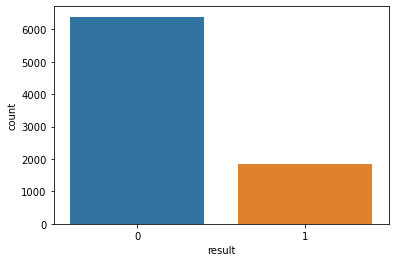

In [162]:
sns.countplot(x=y_train)
plt.show()

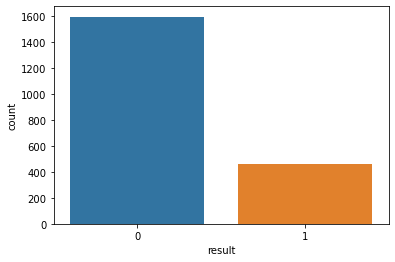

In [163]:
sns.countplot(x=y_test)
plt.show()

In [164]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8233, 14869), (8233,), (2059, 14869), (2059,))

In [165]:
from sklearn.utils import compute_class_weight

classWeights = compute_class_weight("balanced", classes = np.unique(df_tar['result']),
                                     y = df_tar['result'])

class_Weights = dict(zip(np.unique(np.unique(df_tar['result'])), classWeights))

print(class_Weights)

{0: 0.6445390781563126, 1: 2.229636048526863}


In [200]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

## logistic regression

In [192]:
lr = LogisticRegression(class_weight=classWeights)

In [193]:
lr.fit(X_train, y_train)

C:\Users\otaku7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:680: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":


LogisticRegression(class_weight=array([0.64453908, 2.22963605]))

In [194]:
Train_lrScore = lr.score(X_train, y_train)

In [195]:
print(f'Train Accuracy score of Logistic Regression is : {round(Train_lrScore * 100 ,2)}%')

Train Accuracy score of Logistic Regression is : 99.23%


In [196]:
Test_lrScore = lr.score(X_test, y_test)

In [197]:
print(f'Test Accuracy score for Logistic Regression is : {round(Test_lrScore * 100 ,2)}%')

Test Accuracy score for Logistic Regression is : 97.91%


In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [199]:
lrPreds = lr.predict(X_test)

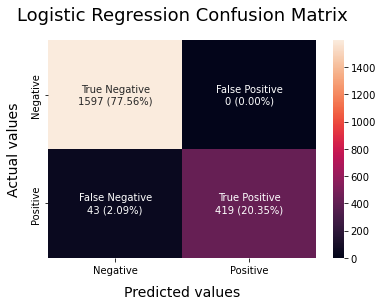

In [201]:
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

In [202]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       0.97      1.00      0.99      1597
         Yes       1.00      0.91      0.95       462

    accuracy                           0.98      2059
   macro avg       0.99      0.95      0.97      2059
weighted avg       0.98      0.98      0.98      2059



## decision tree